<a href="https://colab.research.google.com/github/AArchLichKing/CenterNet/blob/Testing-Features/ECE687_HW_2_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.1

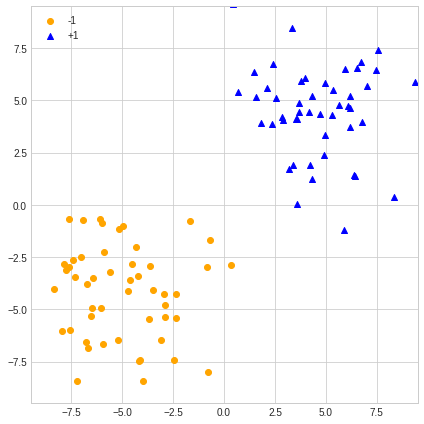

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import math

mean_neg = np.asarray([-5, -5])
mean_pos = np.asarray([5, 5])
cov  = 5*np.eye(2)

X_neg = np.random.multivariate_normal(mean_neg, cov, size=(50,))
y_neg = -np.ones((50,))

X_pos = np.random.multivariate_normal(mean_pos, cov, size=(50,))
y_pos = np.ones((50,))

X = np.concatenate([X_neg, X_pos])
y = np.concatenate([y_neg, y_pos])

fig = plt.figure(figsize=[6,6])
ax = plt.axes()

plt.scatter(X_neg[:,0], X_neg[:,1], c='orange', marker='o', label=r'-1')
plt.scatter(X_pos[:,0], X_pos[:,1], c='blue', marker='^', label=r'+1')

plt.legend(loc="upper left")

plt.xlim([-9.5,9.5])
plt.ylim([-9.5,9.5])

plt.tight_layout()

plt.show()

4.2

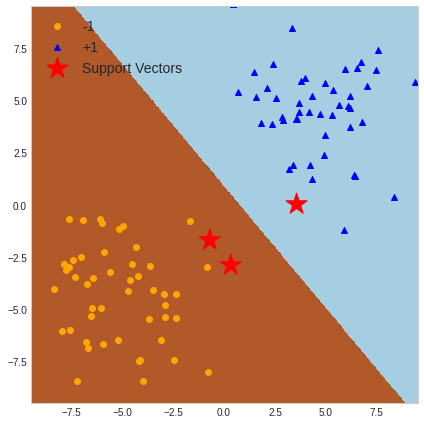

In [121]:
from sklearn import svm

model = svm.SVC(C=1.0, kernel='linear')
model.fit(X,y)

x1 = np.linspace(-10, 10, 1000)
x2 = np.linspace(-10, 10, 1000)
x1v, x2v = np.meshgrid(x1, x2, indexing='ij')
x1v = x1v.reshape(1000, 1000, 1)
x2v = x2v.reshape(1000, 1000, 1)
xx  = np.concatenate([x1v,x2v], axis=-1).reshape(-1, 2)
yy  = model.predict(xx)

fig = plt.figure(figsize=[6,6])
ax = plt.axes()

ax.contourf(x1v.reshape(1000, 1000), 
            x2v.reshape(1000, 1000), 
            -yy.reshape(1000, 1000), 
            cmap='Paired')
ax.scatter(X_neg[:,0], X_neg[:,1], c='orange', marker='o', label=r'-1')
ax.scatter(X_pos[:,0], X_pos[:,1], c='blue', marker='^', label=r'+1')
ax.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], 
           c='red', marker='*', 
           sizes=500*np.ones(model.support_vectors_[:,1].shape), 
           label='Support Vectors')

plt.legend(loc="upper left", fontsize=14)

plt.xlim([-9.5,9.5])
plt.ylim([-9.5,9.5])

plt.tight_layout()
plt.grid(True)

plt.show()

4.3

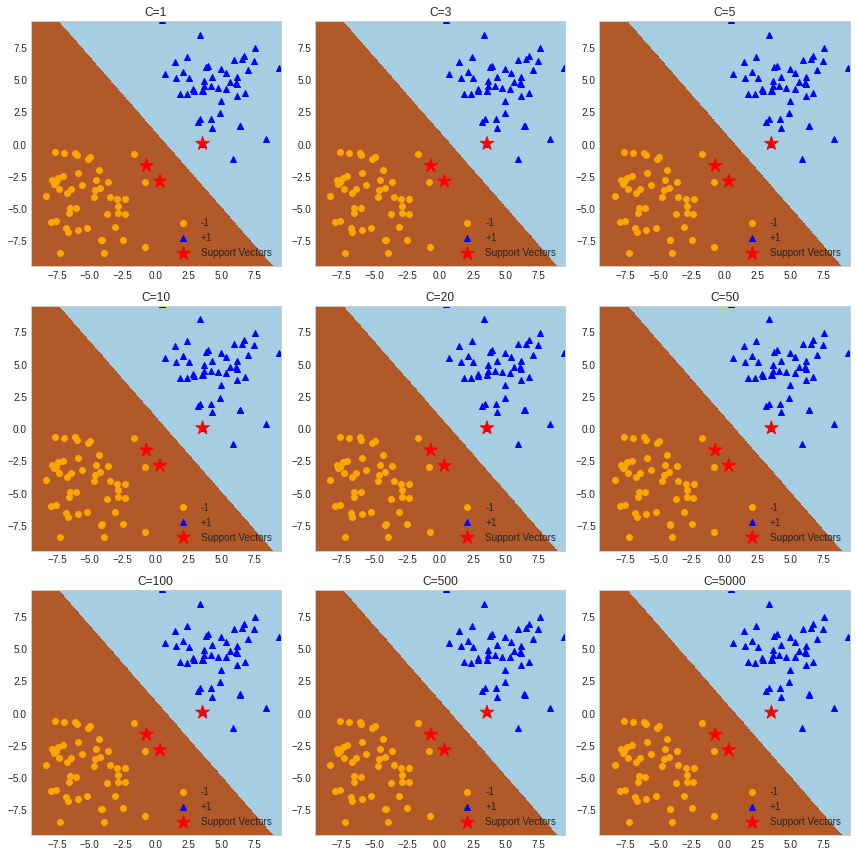

In [122]:
fig, axs = plt.subplots(3,3, figsize=[12,12])

Cs  = [[1, 3, 5], [10, 20, 50], [100, 500, 5000]]
SVs = []

for i in range(3):
   for j in range(3):
      
      model = svm.SVC(C=Cs[i][j], kernel='linear')
      model.fit(X,y)

      x1 = np.linspace(-10, 10, 1000)
      x2 = np.linspace(-10, 10, 1000)
      x1v, x2v = np.meshgrid(x1, x2, indexing='ij')
      x1v = x1v.reshape(1000, 1000, 1)
      x2v = x2v.reshape(1000, 1000, 1)
      xx  = np.concatenate([x1v,x2v], axis=-1).reshape(-1, 2)
      yy  = model.predict(xx)

      axs[i,j].contourf(x1v.reshape(1000, 1000), 
                        x2v.reshape(1000, 1000), 
                        -yy.reshape(1000, 1000), 
                        cmap='Paired')
      axs[i,j].scatter(X_neg[:,0], X_neg[:,1], 
                       c='orange', marker='o', label=r'-1')
      axs[i,j].scatter(X_pos[:,0], X_pos[:,1], 
                       c='blue', marker='^', label=r'+1')
      axs[i,j].scatter(model.support_vectors_[:,0], 
                       model.support_vectors_[:,1], 
                       c='red', marker='*', 
                       sizes=200*np.ones(model.support_vectors_[:,1].shape), 
                       label='Support Vectors')

      axs[i,j].set_xlim([-9.5,9.5])
      axs[i,j].set_ylim([-9.5,9.5])

      axs[i,j].title.set_text(f"C={Cs[i][j]}")

      axs[i,j].legend(loc="lower right", fontsize=10)

      SVs.append(len(model.support_vectors_[:,0]))

plt.tight_layout()
plt.grid(True)

plt.show()

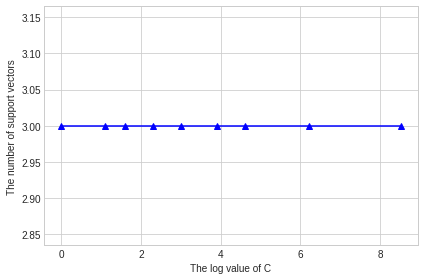

In [123]:
fig = plt.figure()
ax = plt.axes()

ax.plot(np.log(np.asarray(Cs).reshape(-1)), np.asarray(SVs), 
        c='blue', marker='^')

plt.xlabel("The log value of C")
plt.ylabel("The number of support vectors")

plt.tight_layout()
plt.grid(True)

plt.show()

Clearly, there is no relation betwwen C and the number of support vectors. 

4.4

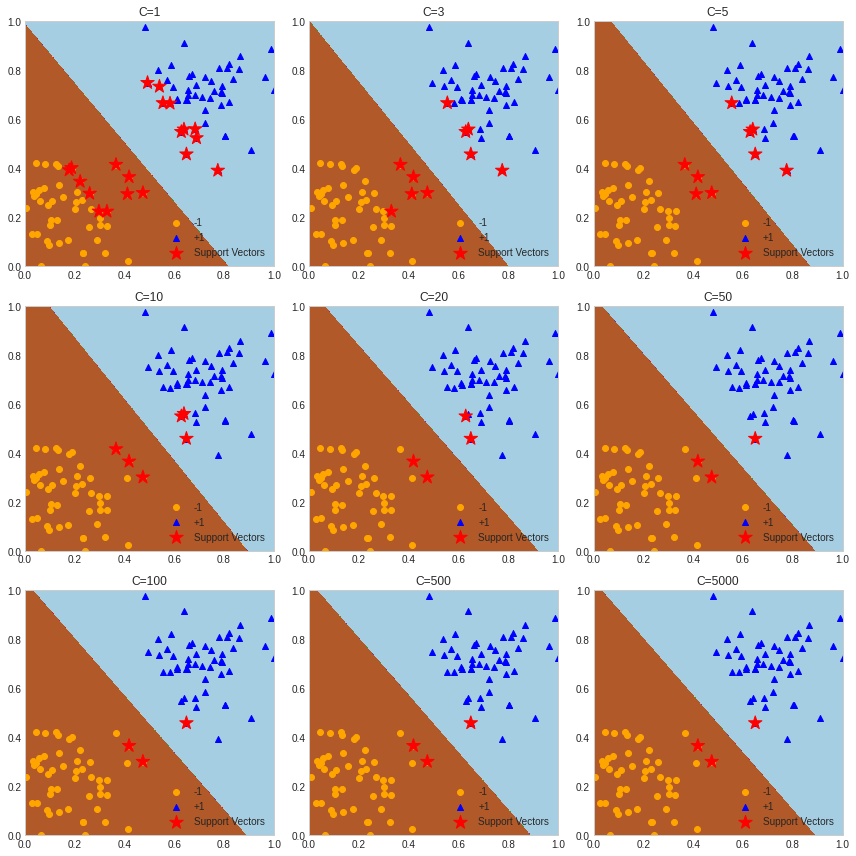

In [124]:
X_01 = (X - np.min(X)) / (np.max(X) - np.min(X))

fig, axs = plt.subplots(3,3, figsize=[12,12])

Cs  = [[1, 3, 5], [10, 20, 50], [100, 500, 5000]]
SVs = []

for i in range(3):
   for j in range(3):
      
      model = svm.SVC(C=Cs[i][j], kernel='linear')
      model.fit(X_01,y)

      x1 = np.linspace(0, 1, 1000)
      x2 = np.linspace(0, 1, 1000)
      x1v, x2v = np.meshgrid(x1, x2, indexing='ij')
      x1v = x1v.reshape(1000, 1000, 1)
      x2v = x2v.reshape(1000, 1000, 1)
      xx  = np.concatenate([x1v,x2v], axis=-1).reshape(-1, 2)
      yy  = model.predict(xx)

      axs[i,j].contourf(x1v.reshape(1000, 1000), 
                        x2v.reshape(1000, 1000), 
                        -yy.reshape(1000, 1000), 
                        cmap='Paired')
      axs[i,j].scatter(X_01[y<0][:,0], 
                       X_01[y<0][:,1], 
                       c='orange', marker='o', label=r'-1')
      axs[i,j].scatter(X_01[y>0][:,0], 
                       X_01[y>0][:,1], 
                       c='blue', marker='^', label=r'+1')
      axs[i,j].scatter(model.support_vectors_[:,0], 
                       model.support_vectors_[:,1], 
                       c='red', marker='*', 
                       sizes=200*np.ones(model.support_vectors_[:,1].shape), 
                       label='Support Vectors')

      #axs[i,j].set_xlim([-9.5,9.5])
      #axs[i,j].set_ylim([-9.5,9.5])

      axs[i,j].title.set_text(f"C={Cs[i][j]}")

      axs[i,j].legend(loc="lower right", fontsize=10)

      SVs.append(len(model.support_vectors_[:,0]))

plt.tight_layout()
plt.grid(True)

plt.show()

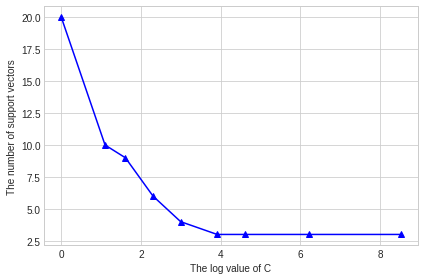

In [125]:
fig = plt.figure()
ax = plt.axes()

ax.plot(np.log(np.asarray(Cs).reshape(-1)), np.asarray(SVs), 
        c='blue', marker='^')

plt.xlabel("The log value of C")
plt.ylabel("The number of support vectors")

plt.tight_layout()
plt.grid(True)

plt.show()

Clearly, we can see form the figure that the larger the $C$ is the smaller the number of support vectors. And the decision boundaries are different from those in the previous questions. 

a) The geometric margin is fixed above and below the decision boundary. However, when the magnitude of data points is large, all data points will fall out of the margin, while when the data are scaled to 0 and 1. More data points lie i the margin for a fixed $C$. When $C$ is large, the margin becomes small and hence fewer support vectors and vice versa. 

b) When the magnitude of each feature is normalized in the same range, their effect are more influenced by the relative magnitude within the feature, instead of the magnitude of each component. 



4.5

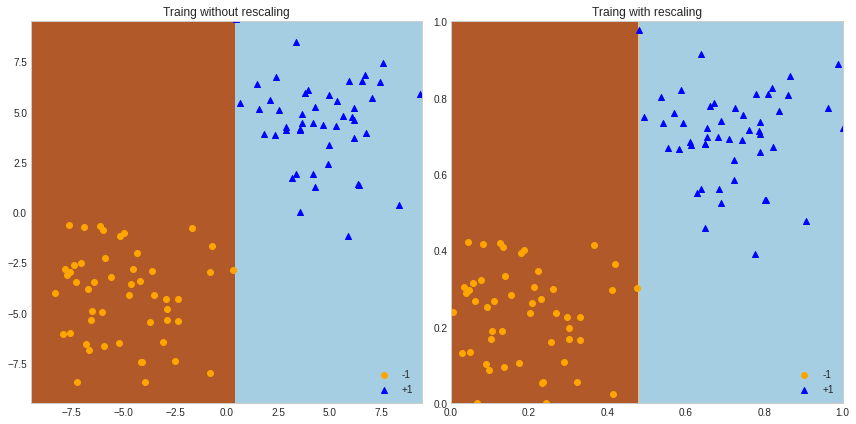

In [126]:
np.random.seed(0)
from sklearn.ensemble import GradientBoostingClassifier

fig, axs = plt.subplots(1,2, figsize=[12,6])
dataset = [X, X_01]
names = ['Traing without rescaling', 'Traing with rescaling']
lb, rb = [-10, 0], [10, 1]
for i in range(2):
      
      model = GradientBoostingClassifier(max_depth=5)
      model.fit(dataset[i],y)

      x1 = np.linspace(lb[i], rb[i], 1000)
      x2 = np.linspace(lb[i], rb[i], 1000)
      x1v, x2v = np.meshgrid(x1, x2, indexing='ij')
      x1v = x1v.reshape(1000, 1000, 1)
      x2v = x2v.reshape(1000, 1000, 1)
      xx  = np.concatenate([x1v,x2v], axis=-1).reshape(-1, 2)
      yy  = model.predict(xx)

      axs[i].contourf(x1v.reshape(1000, 1000), 
                        x2v.reshape(1000, 1000), 
                        -yy.reshape(1000, 1000), 
                        cmap='Paired')
      axs[i].scatter(dataset[i][y<0][:,0], 
                       dataset[i][y<0][:,1], 
                       c='orange', marker='o', label=r'-1')
      axs[i].scatter(dataset[i][y>0][:,0], 
                       dataset[i][y>0][:,1], 
                       c='blue', marker='^', label=r'+1')

      axs[i].title.set_text(f"{names[i]}")

      axs[i].legend(loc="lower right", fontsize=10)

      axs[0].set_xlim([-9.5,9.5])
      axs[0].set_ylim([-9.5,9.5])

plt.tight_layout()
plt.grid(True)

plt.show()

The decision boundaries are the same which coincides with the intuition that the magnitude will not affect tree methods, since the they are looking at the relative largeness. 